# 22:10 Introduction

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")
plt.rcParams['figure.facecolor'] = 'white'
pd.__version__

'0.23.1'

In [51]:
# Taken from R package, tab-separated (vs.comma separated)

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [52]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [53]:
type(df)

pandas.core.frame.DataFrame

In [54]:
df.shape # rows x columns

(1704, 6)

In [55]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [56]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [57]:
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.331999999999997, 9240934,
        820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.1007099999999],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499602999999],
       ['Zimbabwe', 'Africa', 2002, 39.989000000000004, 11926563,
        672.0386227000001],
       ['Zimbabwe', 'Africa', 2007, 43.486999999999995, 12311143,
        469.70929810000007]], dtype=object)

In [58]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# 37:50 Subsetting

In [60]:
# Return a Series (column of data)
country_df = df["country"]

In [61]:
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [62]:
type(country_df)

pandas.core.series.Series

In [63]:
# Returning a df from a colun of data
country_df = df[["country"]]

In [64]:
country_df.head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [65]:
type(country_df)

pandas.core.frame.DataFrame

In [66]:
subset = df[["country", "continent", "year"]]

In [67]:
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [68]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [69]:
# Filter rows using an accessor - pass in the index
df.loc[0] 

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [70]:
df.loc[[0,1]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


In [71]:
# Row, column(s)
df.loc[:2, ["year", "pop"]]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083


In [72]:
# Rows, column(s)
df.iloc[:2,[2,4]]

,year,pop
0,1952,8425333
1,1957,9240934


In [73]:
# Refer to python slicing notation
df.iloc[-5::2,:]

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


# 59:00 Grouped Calculations

In [74]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


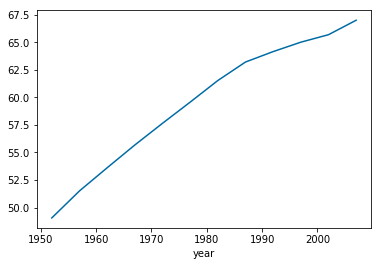

In [79]:
df.groupby("year")["lifeExp"].mean().plot()
plt.show()

In [42]:
grouped_1 = df.groupby(["year", "continent"])[["lifeExp", "gdpPercap"]].mean()

In [44]:
grouped_1.head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [82]:
df.to_csv("my_csv", sep=',', encoding='utf-8')